# Intelligent Systems - Assignment 2 - Neural Network

## Imports

In [131]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, explained_variance_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, cohen_kappa_score

## Wisconsin Breast Cancer Original Dataset

### Loading dataset and Creating train-test sets

In [132]:
data = pd.read_csv('wbco.csv')
data.replace('?', None, inplace = True)
data.dropna(inplace = True)
var_names = ["ClumpThickness", "UniformityOfCellSize", "UniformityOfCellShape", "MarginalAdhesion", "SingleEpithelialCellSize", "BlandChromatin", "NormalNucleoli", "Mitoses"]
data = data.to_numpy()
scaler = MinMaxScaler()
data = scaler.fit_transform(data)
X = data[:,:9]
y = data[:,9]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Train model

In [133]:
regr = MLPClassifier(hidden_layer_sizes = (31,31,31), random_state = 42, max_iter = 500)
regr.fit(X_train, y_train)

c:\Users\Francisco\Desktop\Uni\2º Ano\SI\Ambiente\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(31, 31, 31), max_iter=500, random_state=42)

### Get model predictions

In [134]:
y_pred = regr.predict(X_test)

### Compute classification metrics

In [135]:
acc_score = accuracy_score(y_test, y_pred)
print("Accuracy: {:.3f}".format(acc_score))
rec_score = recall_score(y_test, y_pred)
print("Recall: {:.3f}".format(rec_score))
prec_score = precision_score(y_test, y_pred)
print("Precision Score: {:.3f}".format(prec_score))
F1_score = f1_score(y_test, y_pred)
print("F1-Score: {:.3f}".format(F1_score))
kappa = cohen_kappa_score(y_test, y_pred)
print("Kappa Score: {:.3f}".format(kappa))

Accuracy: 0.971
Recall: 0.960
Precision Score: 0.960
F1-Score: 0.960
Kappa Score: 0.937


## Hair Dryer Dataset

### Loading dataset and Creating train-test sets

In [136]:
data1 = pd.read_csv('hairdryer.csv', header = None)
data1.columns = ["Voltage","Air_Temperature"]
var_names1 = []
var_names1.append(data1.columns[0])
data1 = data1.to_numpy()
scaler1 = MinMaxScaler()
data1 = scaler1.fit_transform(data1)
X1 = data1[:,0:1]
y1 = data1[:,1]
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.2, random_state = 42)

### Train model

In [137]:
regr1 = MLPRegressor(hidden_layer_sizes = (20,20), random_state = 42, max_iter = 1000, learning_rate_init = 0.001)
regr1.fit(X_train1, y_train1)

MLPRegressor(hidden_layer_sizes=(20, 20), max_iter=1000, random_state=42)

### Get model predictions

In [138]:
y_pred1 = regr1.predict(X_test1)

### Compute regression metrics

In [139]:
mse1 = mean_squared_error(y_test1, y_pred1)
print("Mean Squared Error: {:.3f}".format(mse1))
mape1 = mean_absolute_percentage_error(y_test1, y_pred1)
print("Mean Absolute Percentage Error: {:.1f}%".format(mape1*100))
exp_var1 = explained_variance_score(y_test1, y_pred1)
print("Explained Variance Score: {:.3f}".format(exp_var1))

Mean Squared Error: 0.067
Mean Absolute Percentage Error: 80.5%
Explained Variance Score: 0.029


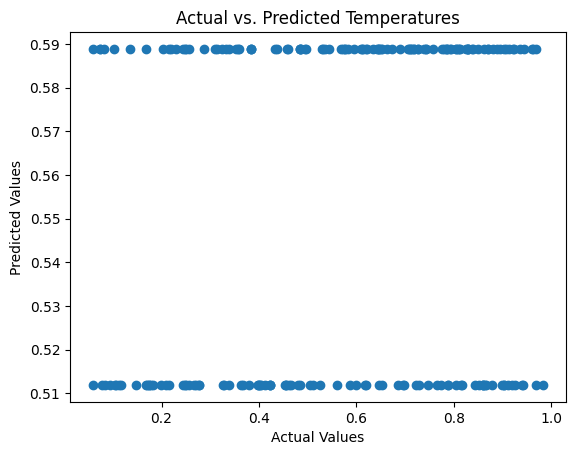

In [140]:
plt.scatter(y_test1, y_pred1)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Temperatures")
plt.show()

## GITHUB

https://github.com/FranciscoCarvalho26/SI